# Project: Investigating movie data from TMDb

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#limitations">Limitations</a></li>
<li><a href="#conclusion">Conclusion</a></li>
</ul>

<a id='intro'></a>
## Introduction

> The dataset is from a movie database called TMDb. It consists of 10,000 movies and has 21 features on each movie including the revenue, cast, genre and voter rating.

In [1]:
# import all packages and set plot to be enbedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

In [2]:
# set color palette for plots
color = sb.color_palette()[0]

<a id='wrangling'></a>
## Data Wrangling

### Assessing Data

In [3]:
# load dataset and show all the columns in the dataframe
df = pd.read_csv('tmdb-movies.csv', index_col = False)
pd.set_option('display.max_columns', None)
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,android|spaceship|jedi|space opera|3d,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,car race|speed|revenge|suspense|car,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [4]:
# high-level overview of data shape and composition
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [5]:
# check for duplicate rows
df[df.duplicated(keep = False)]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2089,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,martial arts|dystopia|based on video game|mart...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0
2090,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,martial arts|dystopia|based on video game|mart...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0


### Cleaning Data

In [6]:
# drop duplicate rows
df.drop_duplicates(inplace = True)

In [7]:
# convert release_date column to datatime object and release_year column to categorical object
df['release_date'] = pd.to_datetime(df['release_date'])
#df['release_year'] = df['release_year'].astype('category')

In [8]:
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,android|spaceship|jedi|space opera|3d,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,car race|speed|revenge|suspense|car,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09


<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1: What is the distribution of the voter ratings?

A histogram is a suitable plot type in this case as the voter ratings are not discrete.

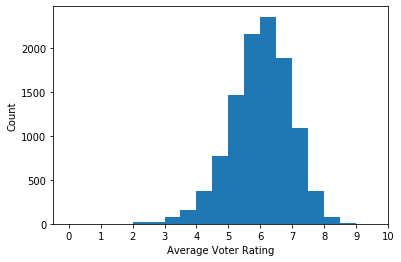

In [9]:
# distribution of the average voter rating using histogram
binsize = 0.5
bins = np.arange(0, df['vote_average'].max()+binsize, binsize)
ticksize = 1
ticks = np.arange(0, df['vote_average'].max()+ticksize, ticksize)
plt.hist(data = df, x = 'vote_average', bins = bins, color = color)
plt.xticks(ticks)
plt.xlabel('Average Voter Rating')
plt.ylabel('Count')
plt.show()

The voter ratings fall between 2 to 8.5 with a peak at 6.5. There is small tail at the lower end of the movie ratings range.

### Research Question 2: Did the movie runtime change over time?

To find how the runtime changed over time, we can group the runtime of all the movies by release year and find the mean runtime,

In [10]:
# group by release year and find the average runtime per year
df.groupby('release_year').mean()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,budget_adj,revenue_adj
release_year,,,,,,,,,
1960,15715.281250,0.458932,6.892796e+05,4.531406e+06,110.656250,77.531250,6.325000,5.082036e+06,3.340991e+07
1961,18657.000000,0.422827,1.488290e+06,1.089420e+07,119.419355,77.580645,6.374194,1.085687e+07,7.947167e+07
1962,17001.062500,0.454783,1.710066e+06,6.736870e+06,124.343750,74.750000,6.343750,1.232693e+07,4.856238e+07
1963,16556.000000,0.502706,2.156809e+06,5.511911e+06,111.323529,82.823529,6.329412,1.535687e+07,3.924580e+07
1964,17379.571429,0.412428,9.400753e+05,8.118614e+06,109.214286,74.690476,6.211905,6.608980e+06,5.707603e+07
1965,17564.714286,0.342587,2.005860e+06,1.308805e+07,118.171429,52.000000,6.194286,1.388168e+07,9.057670e+07
1966,16514.000000,0.304112,1.251191e+06,1.842102e+06,106.891304,31.739130,6.128261,8.405522e+06,1.237527e+07
1967,17429.700000,0.471154,2.516305e+06,1.844587e+07,104.950000,77.550000,6.242500,1.644849e+07,1.205763e+08
1968,18628.589744,0.484202,1.844590e+06,6.788025e+06,107.282051,108.128205,6.379487,1.156367e+07,4.255388e+07


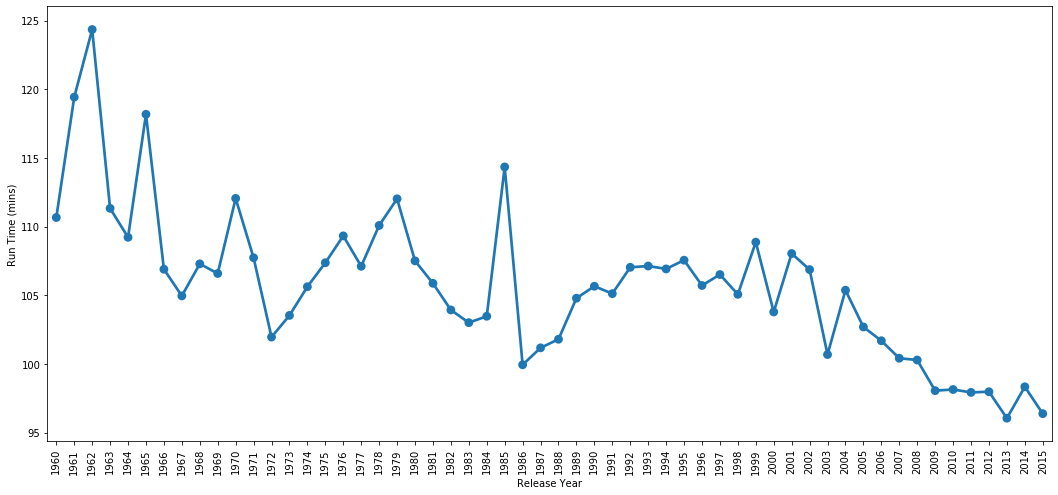

In [11]:
# relationhsip between the runtime and the release_year using line plot
plt.figure(figsize = [18,8])
sb.pointplot(data = df, x = 'release_year', y = 'runtime', color = color, linestyles = '-', ci = None)
plt.xticks(rotation = 90)
plt.xlabel('Release Year')
plt.ylabel('Run Time (mins)')
plt.show()

The average runtime of movies decreased from 110 mins in 1960 to 96 mins in 2015.

### Research Question 3: Is a large movie budget correlated to a higher voter rating?

A heatmap can used to show the correlation between the movie features,

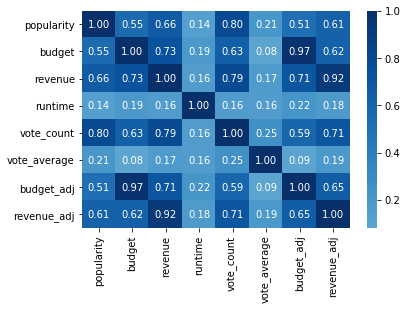

In [12]:
# correalation heatmap between quant variables
quant_vars = ['popularity','budget','revenue','runtime','vote_count','vote_average','budget_adj','revenue_adj']
sb.heatmap(df[quant_vars].corr(), cmap = 'Blues', annot = True, fmt = '.2f', center = 0)
plt.show()

There is little to no correlation between the budget and the voter rating. However, a large budget often brings in a large revenue.

### Research Question 4: Which genres are the most popular from year to year?

To answer this question, I decided to count the number of movies of every genre by decade. The movies had multiple genres seperated by the pipe character. So I seperated them each into their own columns. I then assigned each of the years into their respective decades. After that, I grouped each of the movies by decade and counted the number of movies for each genre for every decade,

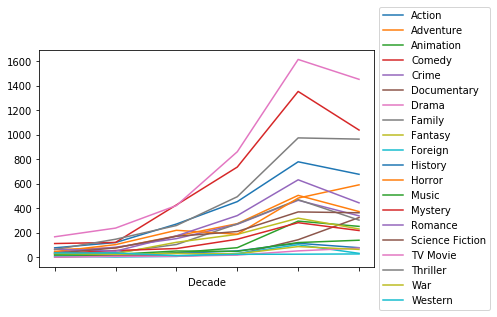

In [13]:
# split the different genres into their own columns and get dummy variables that can be counted
df2 = pd.concat([df, df['genres'].str.get_dummies(sep = '|')], axis = 1)

# cut the years into decades
binsize = 10
bins = np.arange(df['release_year'].min(), df['release_year'].max()+binsize, binsize)
df2['Decade'] = pd.cut(df2['release_year'], bins = bins, right = False, labels = ['1960s','1970s','1980s','1990s','2000s','2010s'])

# group the number of moview by genre for each decade and plot line plot
gb = df2.groupby('Decade')[['Action','Adventure','Animation','Comedy','Crime','Documentary','Drama','Family','Fantasy','Foreign','History','Horror','Music','Mystery','Romance','Science Fiction','TV Movie','Thriller','War','Western']].sum().plot()
plt.legend(loc = 'center left', bbox_to_anchor = (1, 0.5), ncol = 1)
plt.show()

Drama has consistently maintained the most popular genre over the decades.

<a id='limitations'></a>
## Limitations

> When analyzing research question three, movies with large budgets were found to bring in high revenue. Even though there is significant correalation, more statistical analysis is needed to conclude that simply increasing the movie budget would lead to greater revenue.

> The data set contains movies with release years from 1960 to 2015. For research question four, we plotted the number of movies released for each genre per decade. However the last decade only contained information for five years. So the dip in the number of movies for each genre from 2010 should be ignored.

<a id='conclusions'></a>
## Conclusion

> The voter rating has a large range and has a peak at around 6.5. The movie runtime has seen a decline over time although there is significant fluctuation over the years. A larger movie budget does not result in a better movie rating and drama is the most popular genre over time.

In [14]:
# create .html file
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0